# 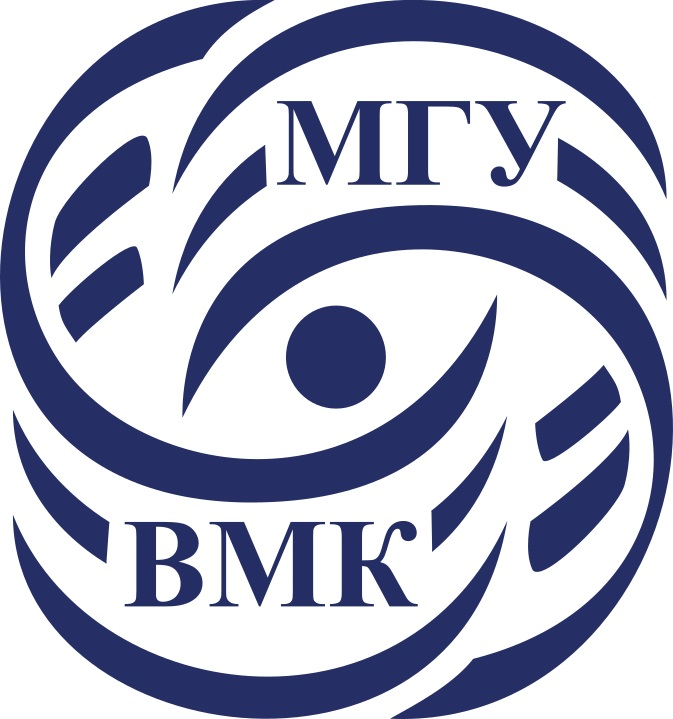

# Машинное обучение. ВМК МГУ

# Практическое задание 6: Линейные модели: классификация

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Научиться работать с разными типами признаков;
* Понять, чем отличаются разные регуляризаторы;
* Приятно провести осенний вечер, предсказывая дождь.

---

<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: до 30 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [50]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 1.40MB/s]


Проверим версию библиотеки:

In [51]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 1. Классификация

Напомним, что бинарная линейная классификация с классами $0$ и $1$ &mdash; это модель следующего вида:
$a(x)= \begin{cases}
1, & \langle w, x \rangle + b > 0; \\
0, & \text{иначе.}
\end{cases}$

где  $w \in \mathbb{R}^d$,  $b \in \mathbb{R}$. В логистической регрессии $p(x) = \frac{1}{1 + e^{-[\langle w, x \rangle + b]}}$ интерпретируется как вероятность принадлежности к первому классу. Если объект $x$ принадлежит классу $1$ с вероятностью $p(x)$, то правдоподобие записывается в виде $\prod_{i=1}^{n} p(x_i)^{y_i} \cdot \left( 1 - p(x_i) \right)^{1 - y_i}$. Обучить логистическую регрессию означает найти параметры $w$ и $b$, которые максимизируют указанное правдоподобие. Что эквивалентно минимизации $- \sum_{i=1}^n y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i))$. Указанная функция потерь называет логистической (или логлосс).

По тем же причинам, что и в линейной регрессии, к логистической функции потерь добавляется регуляризация (стандартно это $l_2$).

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Можно ли использовать  $𝑙_1$  регуляризацию в логистической регрессии?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Да. `LogisticRegression(penalty='l1', solver='liblinear')`

Использование L1-регрессии приведет к отбору значимых признаков.

Однако стоит отметить, что L1-регуляризация работает только с `'liblinear'` и `'saga'` солверами из доступных.

Давайте рассмотрим модельный пример.

$x_1 \sim Uniform(0, 1)$, $x_2 \sim Uniform(0, 1)$

$y(x_1, x_2)= \begin{cases}
0, & x_1 + x_2 < 5; \\
1, & \text{иначе.}
\end{cases}$

Сгенерируем данные и выучим логистическую регрессию, визуализировав полученный результат.

In [53]:
np.random.seed(1)
X1 = np.random.uniform(0, 5, 100)
X2 = np.random.uniform(0, 5, 100)
X = np.hstack((X1[:, None], X2[:, None]))
Y = np.where(X1 + X2 < 5, 0, 1)

In [54]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(X, Y)

LogisticRegression()

In [55]:
from matplotlib.colors import ListedColormap

def plot_separating_surface(X, y, cls, view_support=False):
    x_min = min(X[:, 0]) - 0.1
    x_max = max(X[:, 0]) + 0.1
    y_min = min(X[:, 1]) - 0.1
    y_max = max(X[:, 1]) + 0.1
    h = 0.005
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    if view_support:
        plt.scatter(X[cls.support_, 0], X[cls.support_, 1],
                    c=y[cls.support_], edgecolors='k', s=150, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.title("Визуализация прогнозатора", size=15)
    plt.xlabel(r'$x_1$', size=15)
    plt.ylabel(r'$x_2$', size=15)

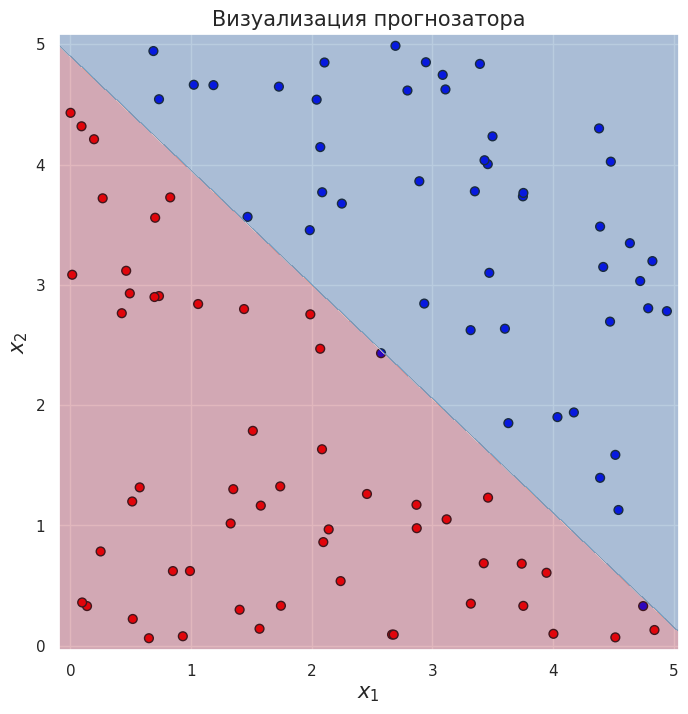

In [56]:
plot_separating_surface(X, Y, clf)

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>
Придумайте, сгенерируйте и визуализируйте пример (рекомендуется использовать написанную выше функцию plot_separating_surface), в котором логистическая регрессия будет плохо классифицировать данные.


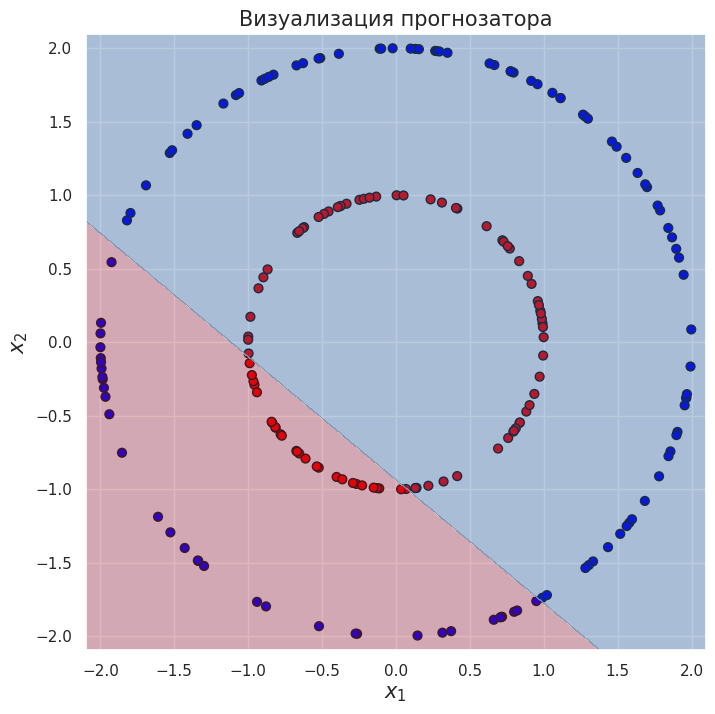

In [57]:
np.random.seed(42)

theta = np.random.uniform(0, 2 * np.pi, 200)
r = np.random.choice([1, 2], size=200)
X = np.column_stack((r * np.cos(theta), r * np.sin(theta)))
Y = (r == 2).astype(int)

clf = LogisticRegression(penalty='l2')
clf.fit(X, Y)

plot_separating_surface(X, Y, clf)
plt.show()

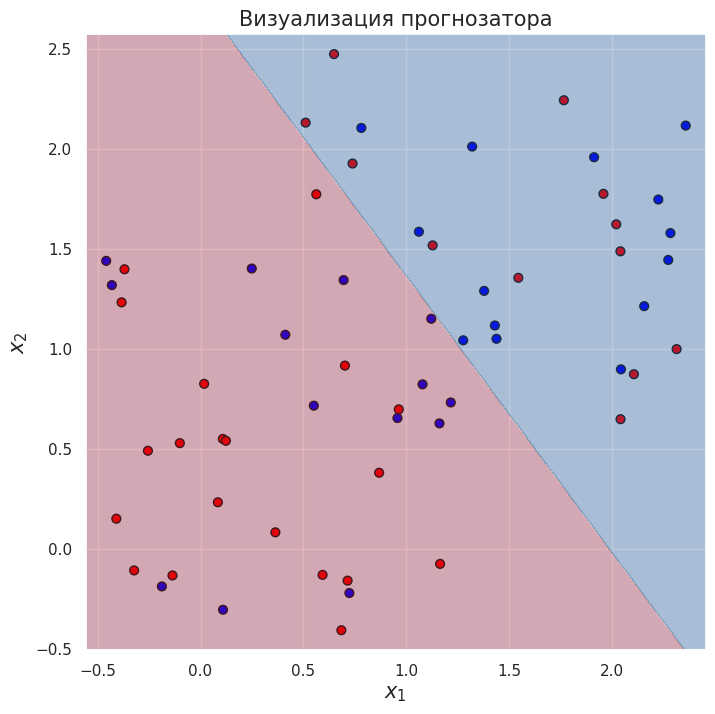

In [58]:
np.random.seed(42)

X1 = np.random.rand(30, 2) * 2 - 0.5
X2 = np.random.rand(30, 2) * 2 + 0.5
X = np.vstack((X1, X2))
Y = np.random.randint(0, 2, 60)

clf = LogisticRegression(penalty='l2')
clf.fit(X, Y)

plot_separating_surface(X, Y, clf)
plt.show()

## Обучение на реальных данных

Рассмотрим набор данных от метеорологической службы одной страны. В нём требуется предсказать, будет ли дождь на следующий день.

Для начала, скачаем данные

In [59]:
!gdown 1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe

Downloading...
From: https://drive.google.com/uc?id=1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 83.3MB/s]


In [13]:
df = pd.read_csv("/content/weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### <font color='DarkOrange'>**Задание 3 [1 балл]**</font>

Что это за страна? Подсказка: жители этой страны воспользовались бы методом tail вместо head :)

In [14]:
print(df['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Австралия

Извлечём немного информации из набора данных

In [15]:
df.shape

(145460, 23)

In [16]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Внимательно приглядимся к столбцам. Напомним, что мы предсказываем значение RainTomorrow. Давайте посмотрим, на этот столбец

In [17]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Целевая переменная содержит неопределённые значения! Их нужно удалить из всей выборки. Также, переименуем 'Yes' и 'No' в $1$ и $0$.

In [18]:
df = df[df['RainTomorrow'] == df['RainTomorrow']]
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1., 'No': 0.})
df['RainToday'] = df['RainToday'].map({'Yes': 1., 'No': 0.})

In [20]:
print(df.shape)

(142193, 23)


Объектов стало чуть-чуть поменьше. Давайте выведем немного информации о них

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

Как видим, у нас есть 17 признаков имеющих вещественные значения (вещественные признаки), и 5 признаков типа object (категориальные признаки). Для них требуется отдельная предобработка. Пока разобьём выборку на обучающую и тестовую.

In [22]:
from sklearn.model_selection import train_test_split

<img src="https://img.devrant.com/devrant/rant/r_2416968_UUKQJ.jpg" width=360 height=760 />

In [23]:
y = df.RainTomorrow
X = df.drop(columns=["RainTomorrow"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [24]:
X_train.shape

(99535, 22)

#### Вещественные признаки

Как вы могли заметить, среди вещественных и категориальных признаков есть пропущенные значения. В случае с вещественными признаками, пропущенные значения заполняют средним, медианой, нулём или даже пытаются предсказывать по другим признакам. Мы заполним медианой

In [25]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_median = numeric_data.median()
numeric_features = numeric_data.columns
X_train = X_train.fillna(numeric_data_median)
X_test = X_test.fillna(numeric_data_median)

In [26]:
len(numeric_features)

17

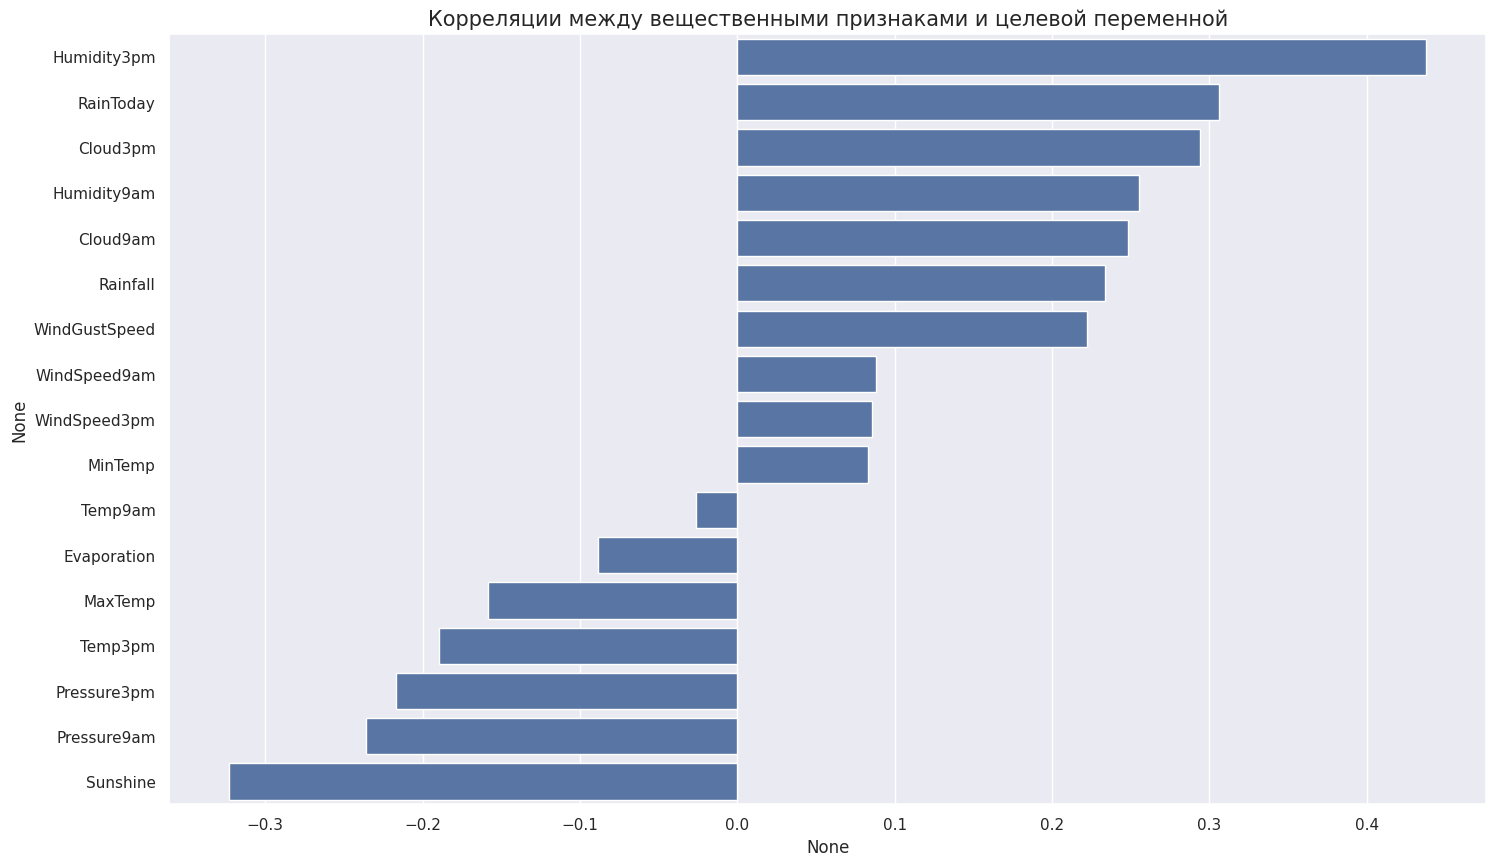

In [27]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title("Корреляции между вещественными признаками и целевой переменной", size=15)
plot.figure.set_size_inches(17, 10)

In [28]:
print("Корреляции между вещественными признаками и целевой переменной:")
for feature, correlation in correlations.items():
    print(f"{feature}: {correlation:.2f}")

Корреляции между вещественными признаками и целевой переменной:
Humidity3pm: 0.44
RainToday: 0.31
Cloud3pm: 0.29
Humidity9am: 0.26
Cloud9am: 0.25
Rainfall: 0.23
WindGustSpeed: 0.22
WindSpeed9am: 0.09
WindSpeed3pm: 0.09
MinTemp: 0.08
Temp9am: -0.03
Evaporation: -0.09
MaxTemp: -0.16
Temp3pm: -0.19
Pressure3pm: -0.22
Pressure9am: -0.24
Sunshine: -0.32


### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Попробуйте объяснить для каких-нибудь признаков получившиеся значения корреляции (почему для одних эти значения высокие, а для других низкие)?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

**Относительно высокие по модулю значения корреляции:**<br>
(вообще говоря, считаются не высокими, а умеренными)

**Humidity3pm: 0.44** <br>
Высокая влажность часто связана с повышенной вероятностью дождя. Когда воздух насыщен влагой, это может привести к образованию облаков и осадков.

**RainToday: 0.31** <br>
Если дождь идет сегодня, то вероятность его продолжения или повторения в ближайшие дни также возрастает.

**Cloud3pm: 0.29** <br>
Облачность может указывать на вероятность осадков. Чем больше облаков, тем выше вероятность дождя, особенно если облака низкие и плотные.

**Sunshine: -0.32**
Чем больше солнечного света, тем меньше вероятность дождя. В солнечные дни обычно ясная погода и осадки отсутствуют.

**Относительно низкие по модулю значения корреляции:**

**WindSpeed9am: 0.09**
Скорость ветра не имеет значительного влияния на вероятность дождя.

**Evaporation: -0.09**
Испарение может быть связано с температурой и влажностью, но его влияние на вероятность дождя незначительно.

**В общем**, маленькое значение корреляции означает, что изменения одной переменной слабо связаны с изменениями другой. А большое положительное (отрицательное) значение означает, что при увеличении одной переменной другая также, как правило, увеличивается (уменьшается).

P.S. Причем стоит сказать, что по умолчанию метод `corrwith()` использует Пирсоновский коэффициент корреляции, который измеряет только **линейную** зависимость между двумя переменными.

----

Дополнительно визуализируем признаки Sunshine и Humidity3pm. Библиотека seaborn предоставляет график swarmplot, который в отличие от scatterplot старается разместить на графике как можно больше точек, так чтобы они не пересекались, уложившись при этом в заданную ширину.

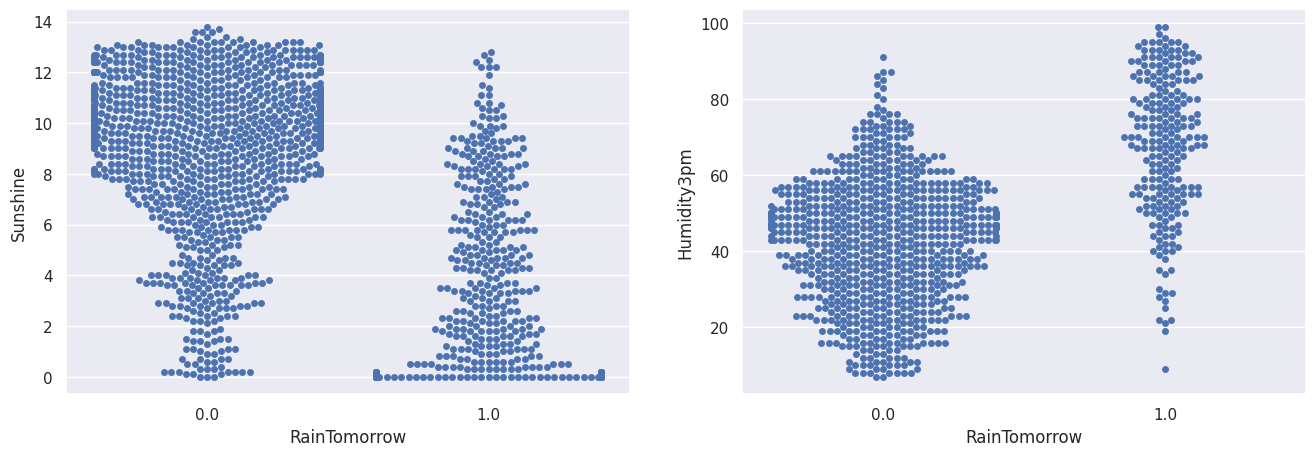

In [29]:
fig, axs = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
_ = sns.swarmplot(x="RainTomorrow", y="Sunshine", data=df.head(10000), ax=axs[0])
_ = sns.swarmplot(x="RainTomorrow", y="Humidity3pm", data=df.head(1000), ax=axs[1])

Для оценки качества классификации воспользуемся реализованными в sklearn logloss и ROC AUC. ROC AUC является метрикой по умолчанию для бинарной классификации, поскольку очень устойчива к несбалансированности классов. Подробнее про неё можно прочитать https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ . Обучим  логистическую регрессию на вещественных признаках, не подбирая константу регуляризации

In [30]:
from sklearn.metrics import log_loss, roc_auc_score

In [31]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train[numeric_features], y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
y_train_pred = model.predict_proba(X_train[numeric_features])[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3635
Train logloss = 0.3695
Test roc auc score = 0.8604
Train roc auc score = 0.8564


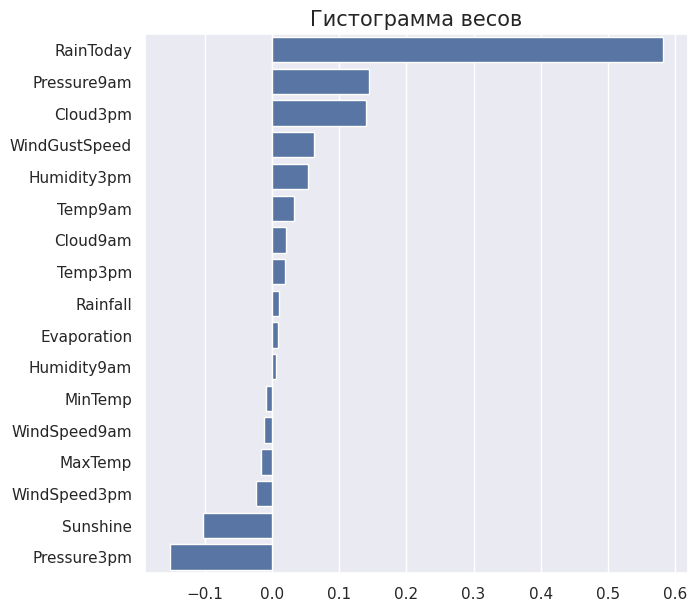

In [33]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

Если приглядеться к весам, то можно увидеть, что между корреляциями признаков с целевой переменной и значением соответствующих весов мало общего. Чтобы это предотвратить, будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

In [35]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3589
Train logloss = 0.3637
Test roc auc score = 0.8652
Train roc auc score = 0.8623


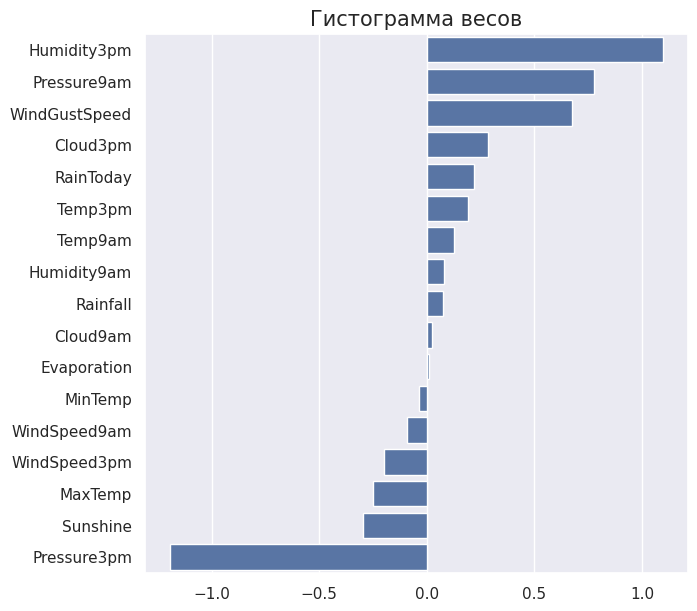

In [37]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

In [38]:
for feature, weight in zip(features, weights):
    print(f"Feature: {feature}, Weight: {weight:.2f}")

Feature: Humidity3pm, Weight: 1.10
Feature: Pressure9am, Weight: 0.78
Feature: WindGustSpeed, Weight: 0.68
Feature: Cloud3pm, Weight: 0.28
Feature: RainToday, Weight: 0.22
Feature: Temp3pm, Weight: 0.19
Feature: Temp9am, Weight: 0.13
Feature: Humidity9am, Weight: 0.08
Feature: Rainfall, Weight: 0.08
Feature: Cloud9am, Weight: 0.02
Feature: Evaporation, Weight: 0.01
Feature: MinTemp, Weight: -0.04
Feature: WindSpeed9am, Weight: -0.09
Feature: WindSpeed3pm, Weight: -0.20
Feature: MaxTemp, Weight: -0.25
Feature: Sunshine, Weight: -0.30
Feature: Pressure3pm, Weight: -1.19


### <font color='DarkOrange'>**Задание 5 [1 балл]**</font>

Почему даже после нормализации график не до конца похож на гистограмму корреляций?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Выбранный коэффициент корреляции отражает только линейную зависимость. Исходные зависимости могут быть сложнее.

Гистограмма корреляций не учитывает важность того или иного признака в контексте других.

Если среди самих признаков есть сильно коррелирующие между собой признаки, это может повлиять на распределение весов. Модель может отдать предпочтение одному из этих признаков, поскольку они предоставляют схожую информацию.


Рассмотрим теперь категориальные признаки. Сразу отметим, что признак "Date" очень опасен, и лучше пока его выкинуть. Это связано с тем, что мы можем получить прямую информацию о том, будет ли завтра дождь, если текущее место и завтрашняя дата встречались где-то в обучающей выборке. Очень часто также встречаются признак наподобие "ID", которые могут содержать аналогичные утечки информации. С такими признаками всегда нужно обращаться осторожно!

In [39]:
categorical = list(X_train.drop(columns=["Date"]).dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [40]:
print(numeric_features)
print(categorical)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


Для работы с категориальными признаками нужно их как-то закодировать числами. Для этого воспользуемся реализацией one-hot кодирования из библиотеки sklearn

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200))
])

model = pipeline.fit(X_train.drop(columns=["Date"]), y_train)
y_pred = model.predict_proba(X_test.drop(columns=["Date"]))[:, 1]
print("Test logloss = %.6f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.349788
Test roc auc score = 0.872092


In [42]:
model.named_steps['classification'].n_iter_

array([154], dtype=int32)

Качество немного выросло, если смотреть на ROC AUC!

### <font color='DarkOrange'>**Задание 6 [1 балл]**</font>

Почему итоговое качество выросло?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

One-hot кодирование позволяет модели учитывать каждую категорию независимо, позволяет избежать ложного восприятия порядковых отношений между номинальными данными, снижает риск переобучения (при малом количестве категорий), так как каждая категория представлена отдельным бинарным признаком. В этом случае модель может лучше различать различные классы (особенно в задачах с несбалансированными данными) и выявлять более сложные зависимости между признаками и целевой переменной.



### <font color='DarkOrange'>**Задание 7 [2 баллa]**</font>

Попробуйте улучшить качество модели, попробовав другие гиперпараметры (например, число итераций, метод оптимизации, константу регуляризации и т.д.). Измерьте получившийся результат и напишите, благодаря чему удалось или не удалось улучшить текущие метрики

Ранее была упомянута проблема мультиколлинеарности. Давайте для начала попробуем повысить качество, исключив один из сильно коррелирующих признаков из модели. Для этого посмотрим на корреляционную матрицу:

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.733991  0.103982     0.366572  0.028980   
MaxTemp        0.733991  1.000000 -0.072187     0.449836  0.314766   
Rainfall       0.103982 -0.072187  1.000000    -0.042005 -0.170799   
Evaporation    0.366572  0.449836 -0.042005     1.000000  0.279801   
Sunshine       0.028980  0.314766 -0.170799     0.279801  1.000000   
WindGustSpeed  0.173910  0.069041  0.125457     0.149185 -0.030886   
WindSpeed9am   0.174989  0.016022  0.081828     0.149353 -0.012285   
WindSpeed3pm   0.174240  0.051490  0.058241     0.101877  0.020750   
Humidity9am   -0.232940 -0.500081  0.220171    -0.387196 -0.332487   
Humidity3pm    0.004700 -0.501101  0.248013    -0.295767 -0.432455   
Pressure9am   -0.425322 -0.307909 -0.160910    -0.213140  0.038926   
Pressure3pm   -0.434802 -0.396096 -0.121960    -0.233499 -0.008269   
Cloud9am       0.042852 -0.233600  0.167152    -0.173773 -0.508425   
Cloud3pm       0.002

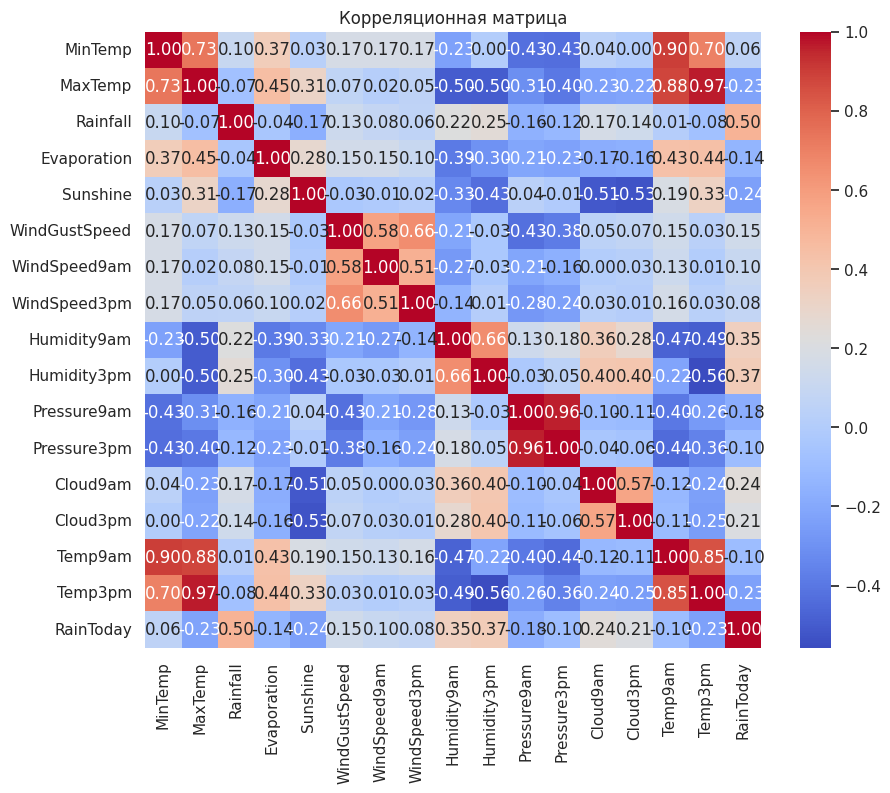

In [43]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_features.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

Видим, например, что признак Temp3pm сильно коррелирует с Temp9am и MaxTemp, это может привести к проблемам с мультиколлинеарностью. Давайте попробуем упростить модель, удалив этот признак.

In [44]:
X_train_reduced = X_train.drop(columns=['Temp3pm'], errors='ignore')
X_test_reduced = X_test.drop(columns=['Temp3pm'], errors='ignore')

In [45]:
numeric_features = X_train_reduced.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = list(X_train_reduced.select_dtypes(include=['object']).columns)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200))
])

model = pipeline.fit(X_train_reduced, y_train)
y_pred = model.predict_proba(X_test_reduced)[:, 1]

print("Test logloss = %.6f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.336167
Test roc auc score = 0.884310


Обе метрики показали улучшение. Теперь попробуем подобрать гиперпараметры.

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classification__C': [0.1, 1.0, 10.0],
    'classification__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'classification__max_iter': [200, 400, 600]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_reduced, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_:.6f}")

Best parameters: {'classification__C': 1.0, 'classification__max_iter': 600, 'classification__solver': 'saga'}
Best ROC AUC Score: 0.882120


In [47]:
results = grid_search.cv_results_
results_df = pd.DataFrame(results)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

results_summary = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

print(results_summary.sort_values(by='rank_test_score'))

                                                                                                 params  mean_test_score  std_test_score  rank_test_score
29        {'classification__C': 1.0, 'classification__max_iter': 600, 'classification__solver': 'saga'}         0.882120        0.002550                1
18         {'classification__C': 1.0, 'classification__max_iter': 200, 'classification__solver': 'sag'}         0.882051        0.002506                2
24        {'classification__C': 1.0, 'classification__max_iter': 400, 'classification__solver': 'saga'}         0.882050        0.002507                3
23         {'classification__C': 1.0, 'classification__max_iter': 400, 'classification__solver': 'sag'}         0.882035        0.002573                4
39       {'classification__C': 10.0, 'classification__max_iter': 400, 'classification__solver': 'saga'}         0.882019        0.002541                5
33        {'classification__C': 10.0, 'classification__max_iter': 200, 'clas

In [48]:
best_params = grid_search.best_params_

best_pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver=best_params['classification__solver'],
                                          C=best_params['classification__C'],
                                          max_iter=best_params['classification__max_iter']))
])

best_model = best_pipeline.fit(X_train_reduced, y_train)
y_pred_best = best_model.predict_proba(X_test_reduced)[:, 1]

logloss = log_loss(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_pred_best)

print("Best Model Test logloss = %.6f" % logloss)
print("Best Model Test ROC AUC Score = %.6f" % roc_auc)

Best Model Test logloss = 0.335727
Best Model Test ROC AUC Score = 0.884558


Обе метрики показали улучшение.

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

**Регуляризация:** <br>
Сильная регуляризация (C = 0.1): результаты похуже по сравнению с C = 1.0, модель не может достаточно хорошо подстроиться под данные из-за сильной регуляризации. <br>
Оптимальная регуляризация (C = 1.0): сбалансированное использование регуляризации.<br>
Слабая регуляризация (C = 10.0): результаты похуже по сравнению с C = 1.0, что указывает на риск переобучения, особенно при использовании более сложных солверов.

**Количество итераций:** <br>
Увеличение max_iter до 600 дало результаты получше для некоторых комбинаций параметров, что указывает на то, что модель могла не достигнуть сходимости при меньших значениях.

**Солвер:** <br>
Наилучший результат был получен с использованием солвера 'saga'. Этот солвер поддерживает как L1, так и L2 регуляризацию и хорошо работает с большими наборами данных. <br>
Другие солверы показали стабильные результаты, но не превзошли производительность 'saga'.

**Стандартное отклонение:** <br>
Низкие значения стандартного отклонения (std_test_score) для лучших параметров указывают на стабильность модели. То есть модель хорошо обобщает на различных подвыборках данных и не переобучается.

**Общий вывод:** <br>
Наилучшие метрики были достигнуты при использовании значения C = 1.0, солвера 'saga' и максимального количества итераций max_iter = 600. <br>




**Выводы** Во второй части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужно нормализовать данные.
2.   Как работать с вещественными и категориальными признаками.
3.   Как интерпретировать результат обучения линейной модели, опираясь на описание обучающих данных

-----------
<font color="white" style="opacity:0.2023"></font>

## <font color='MediumSeaGreen'> **Задание [Bonus][2 балла]** </font>

Вставьте мем или красивую картинку связанные с чем-то из:


1.   Страна, данные о которой мы анализировали
2.   Линейные модели
3.   Погода
4.   Динозавры

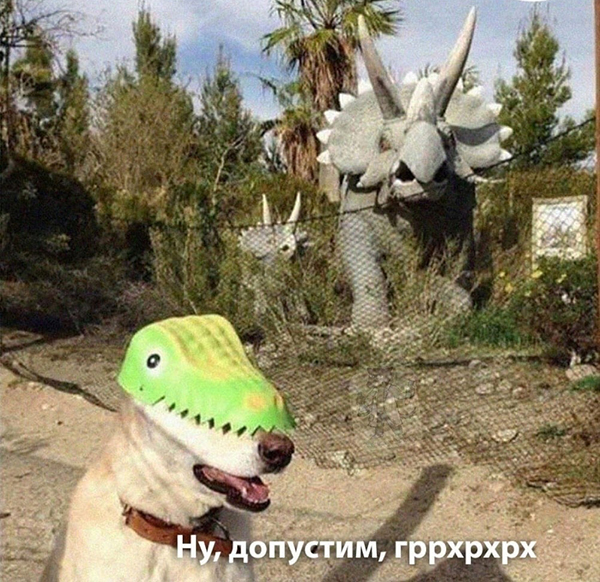